# ECE C247 - Neural Networks & Deep Learning
# EEG Dataset

# Group Members
### Anirudh Krishna 
### Swagath Babu
### Jacob Thomas


# Load the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Define the Parameters

In [3]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

### We tried different values for the Learning Rate and for the Decay. However, the values defined below are considered the best in order to obtain good performance. 

## Load Data

In [5]:
data_path = "/content/drive/My Drive/Dataset/C247/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[4], verbose=True)

Training/Valid data shape: (234, 22, 1000)
Test data shape: (50, 22, 1000)


## Preprocessing

In [6]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Loading

In [7]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Comparing different models for Subject 4 and giving a comparative perspective

### The models architecture can be found in the models.py file

## CNN

In [8]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/187 (0.00%)]		Loss: 1.42437
	Train loss: 0.04568, Accuracy: 42/187 (22.46%)
	Validation loss: 0.02984, Accuracy: 14/47 (29.79%)
	Test loss: 0.02720, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 2 [0/187 (0.00%)]		Loss: 1.34138
	Train loss: 0.04581, Accuracy: 42/187 (22.46%)
	Validation loss: 0.02966, Accuracy: 14/47 (29.79%)
	Test loss: 0.02740, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 3 [0/187 (0.00%)]		Loss: 1.41732
	Train loss: 0.04583, Accuracy: 42/187 (22.46%)
	Validation loss: 0.02960, Accuracy: 14/47 (29.79%)
	Test loss: 0.02716, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 4 [0/187 (0.00%)]		Loss: 1.46689
	Train loss: 0.04564, Accuracy: 42/187 (22.46%)
	Validation loss: 0.02931, Accuracy: 14/47 (29.79%)
	Test loss: 0.02725, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 5 [0/187 (0.00%)]		Loss: 1.42535
	Train loss: 0.04522, Accuracy: 42/187 (22.46%)
	Validation loss: 0.02919, Accuracy: 14/47 (29.79%)
	Test loss: 0.027

Best validation accuracy:
0.380389

Best test accuracy:
0.24

# Plotting Metrics v/s Number of Epochs: 
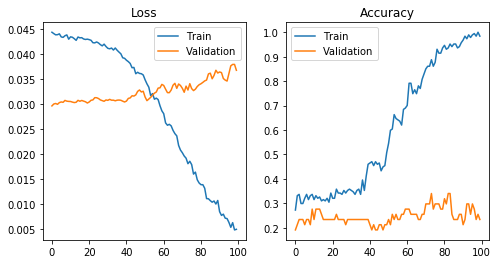

## LSTM

In [9]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/187 (0.00%)]		Loss: 1.46728
	Train loss: 0.04444, Accuracy: 52/187 (27.81%)
	Validation loss: 0.02932, Accuracy: 14/47 (29.79%)
	Test loss: 0.02833, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 2 [0/187 (0.00%)]		Loss: 1.46202
	Train loss: 0.04442, Accuracy: 52/187 (27.81%)
	Validation loss: 0.02940, Accuracy: 14/47 (29.79%)
	Test loss: 0.02832, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 3 [0/187 (0.00%)]		Loss: 1.40963
	Train loss: 0.04435, Accuracy: 53/187 (28.34%)
	Validation loss: 0.02937, Accuracy: 14/47 (29.79%)
	Test loss: 0.02846, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 4 [0/187 (0.00%)]		Loss: 1.42071
	Train loss: 0.04402, Accuracy: 59/187 (31.55%)
	Validation loss: 0.02939, Accuracy: 10/47 (21.28%)
	Test loss: 0.02841, Accuracy: 7/50 (14.00%)

Training Progress: 	Epoch 5 [0/187 (0.00%)]		Loss: 1.38937
	Train loss: 0.04354, Accuracy: 67/187 (35.83%)
	Validation loss: 0.02939, Accuracy: 11/47 (23.40%)
	Test loss: 0.02864, 

Best validation accuracy:
0.3191

Best test accuracy:
0.4

## Plotting Metrics v/s Number of Epochs: 
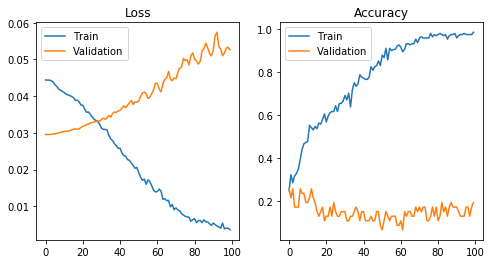

## CNN + LSTM

In [10]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/187 (0.00%)]		Loss: 1.39452
	Train loss: 0.04444, Accuracy: 48/187 (25.67%)
	Validation loss: 0.02966, Accuracy: 10/47 (21.28%)
	Test loss: 0.02785, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 2 [0/187 (0.00%)]		Loss: 1.39346
	Train loss: 0.04442, Accuracy: 48/187 (25.67%)
	Validation loss: 0.02963, Accuracy: 10/47 (21.28%)
	Test loss: 0.02788, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 3 [0/187 (0.00%)]		Loss: 1.39402
	Train loss: 0.04441, Accuracy: 48/187 (25.67%)
	Validation loss: 0.02961, Accuracy: 10/47 (21.28%)
	Test loss: 0.02792, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 4 [0/187 (0.00%)]		Loss: 1.39348
	Train loss: 0.04440, Accuracy: 52/187 (27.81%)
	Validation loss: 0.02960, Accuracy: 14/47 (29.79%)
	Test loss: 0.02796, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 5 [0/187 (0.00%)]		Loss: 1.39620
	Train loss: 0.04439, Accuracy: 52/187 (27.81%)
	Validation loss: 0.02958, Accuracy: 14/47 (29.79%)
	Test loss: 0.0280


Best validation accuracy:
0.3678

Best test accuracy:
0.48

## Plotting Metrics v/s Number of Epochs: 
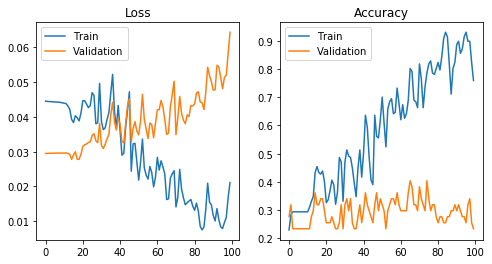

## GRU

In [11]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/187 (0.00%)]		Loss: 1.45440
	Train loss: 0.04484, Accuracy: 48/187 (25.67%)
	Validation loss: 0.02972, Accuracy: 10/47 (21.28%)
	Test loss: 0.02805, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 2 [0/187 (0.00%)]		Loss: 1.42735
	Train loss: 0.04443, Accuracy: 52/187 (27.81%)
	Validation loss: 0.02982, Accuracy: 11/47 (23.40%)
	Test loss: 0.02845, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 3 [0/187 (0.00%)]		Loss: 1.39471
	Train loss: 0.04389, Accuracy: 57/187 (30.48%)
	Validation loss: 0.02997, Accuracy: 11/47 (23.40%)
	Test loss: 0.02873, Accuracy: 9/50 (18.00%)

Training Progress: 	Epoch 4 [0/187 (0.00%)]		Loss: 1.47592
	Train loss: 0.04322, Accuracy: 63/187 (33.69%)
	Validation loss: 0.03004, Accuracy: 10/47 (21.28%)
	Test loss: 0.02886, Accuracy: 9/50 (18.00%)

Training Progress: 	Epoch 5 [0/187 (0.00%)]		Loss: 1.40643
	Train loss: 0.04257, Accuracy: 66/187 (35.29%)
	Validation loss: 0.03007, Accuracy: 9/47 (19.15%)
	Test loss: 0.02879,

Best validation accuracy:
0.270145

Best test accuracy:
0.32

## Plotting Metrics v/s Number of Epochs: 
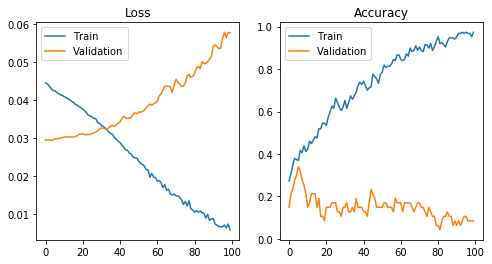

## CNN + GRU

In [12]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/187 (0.00%)]		Loss: 1.38856
	Train loss: 0.04445, Accuracy: 45/187 (24.06%)
	Validation loss: 0.02972, Accuracy: 9/47 (19.15%)
	Test loss: 0.02776, Accuracy: 17/50 (34.00%)

Training Progress: 	Epoch 2 [0/187 (0.00%)]		Loss: 1.38948
	Train loss: 0.04441, Accuracy: 52/187 (27.81%)
	Validation loss: 0.02963, Accuracy: 14/47 (29.79%)
	Test loss: 0.02789, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 3 [0/187 (0.00%)]		Loss: 1.39831
	Train loss: 0.04435, Accuracy: 52/187 (27.81%)
	Validation loss: 0.02957, Accuracy: 14/47 (29.79%)
	Test loss: 0.02799, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 4 [0/187 (0.00%)]		Loss: 1.38883
	Train loss: 0.04431, Accuracy: 52/187 (27.81%)
	Validation loss: 0.02956, Accuracy: 14/47 (29.79%)
	Test loss: 0.02806, Accuracy: 6/50 (12.00%)

Training Progress: 	Epoch 5 [0/187 (0.00%)]		Loss: 1.39625
	Train loss: 0.04426, Accuracy: 52/187 (27.81%)
	Validation loss: 0.02953, Accuracy: 14/47 (29.79%)
	Test loss: 0.02811, 


Best validation accuracy:
0.44808510638297873

Best test accuracy:
0.38

## Plotting Metrics v/s Number of Epochs: 
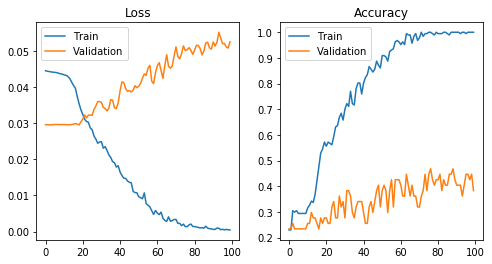